교과서 p.95
# 과제3: 정규분포 난수로 히스토그램 만들기 (팬시 인덱싱과 브로드캐스팅 활용)
목표: 난수를 생성하고, 직접 구간에 속하는 인덱스를 계산하여 히스토그램을 생성. np.searchsorted를 사용하지 않고 각 값이 어느 구간에 속하는지 확인.

## 구현 순서:

1. 난수 생성:

평균이 0, 표준편차가 1인 정규분포에서 난수 10,000개를 생성하여 data 배열에 저장.



In [3]:
import random
import numpy as np
# 평균 0, 표준편차 1인 정규분포에서 난수 10,000개 생성
data = np.random.randn(10000)

2. 구간 설정:

-10에서 10까지 20개의 구간을 균등하게 나누어 bins 배열.
이 구간들은 히스토그램의 각 구간 경계.



In [ ]:
# 20개의 균등한 구간 생성 (21개의 경계점 필요)
bins = np.linspace(-10,10,21)
bin_centers = (bins[:-1] + bins[1:]) 

In [ ]:
3. 구간 인덱스 계산:

data의 각 값이 어느 구간에 속하는지 직접 계산하여 구간 인덱스 배열 indices에 저장.
예를 들어, data의 값이 특정 구간에 속하면 indices 배열에 그 구간 인덱스를 기록합니다.
이 과정에서 브로드캐스팅과 팬시 인덱싱을 활용하여 효율적으로 구간 인덱스를 계산.



In [6]:
# 데이터 배열
data = np.array([-9.5, -4.2, 0.0, 3.3, 9.9])

# 구간 인덱스 계산
# 각 data가 bins의 어느 구간에 속하는지 브로드캐스팅으로 비교
# 조건: bins[i] <= x < bins[i+1]
in_bin = (data[:, None] >= bins[:-1]) & (data[:, None] < bins[1:])

# True가 있는 인덱스를 찾으면 그게 구간 번호
indices = np.argmax(in_bin, axis=1)

# 결과 출력
print("data:", data)
print("bins:", bins)
print("구간 인덱스:", indices)



data: [-9.5 -4.2  0.   3.3  9.9]
bins: [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
구간 인덱스: [ 0  5 10 13 19]


4. 누적 카운팅:

구한 indices 값을 사용하여, 각 구간별로 카운트를 계산.
팬시 인덱싱을 통해 indices에 해당하는 counts 위치에 1씩 누적.



In [7]:
counts = np.zeros(len(bins) -1, dtype = int)
np.add.at(counts, indices, 1)

5. 결과 시각화:

구간별 빈도수를 그래프로 시각화하여 히스토그램.
bins와 counts를 사용하여 히스토그램이 올바르게 그려졌는지 확인.

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL

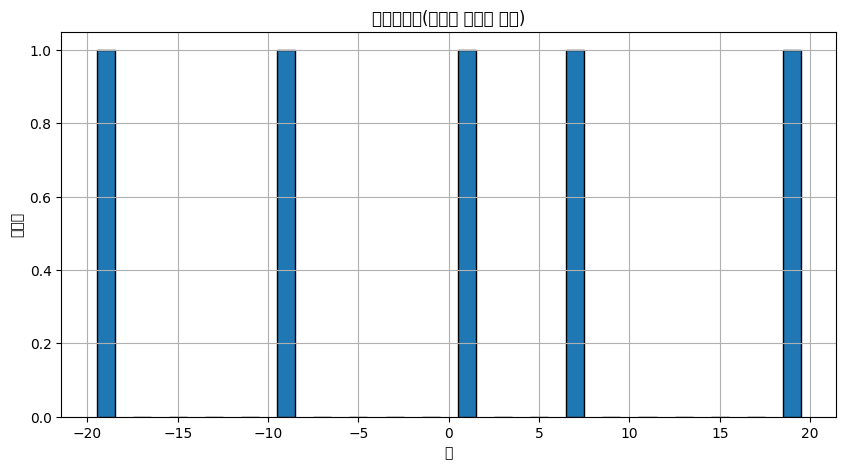

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))
plt.bar(bin_centers, counts, width=(bins[1] - bins[0]), align='center', edgecolor='black')
plt.title("히스토그램(구간별 데이터 개수)")
plt.xlabel("값")
plt.ylabel("빈도수")
plt.grid(True)
plt.show()